In [1]:
import os, glob, shutil
import mne
import numpy as np
import scipy.io as io
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import h5py
from PIL import Image

In [2]:
d = mne.io.read_raw_brainvision('/Users/knapen/Downloads/data/eeg/subj1-3-0.vhdr')

Extracting parameters from /Users/knapen/Downloads/data/eeg/subj1-3-0.vhdr...
Setting channel info structure...


Converting "time" to "<class 'numpy.int64'>"...


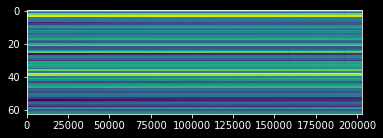

In [3]:
df = d.to_data_frame()
plt.imshow(df.T, aspect=1000)

In [14]:
ev = pd.read_csv('/Users/knapen/Downloads/data/eeg/subj1-3-0.vmrk', skiprows=11)
ev.columns=['marker', 'code', 'timestamp', 'value', 'null', 'largenr']
ev.head(40)

ev.code = [int(evc.split(' ')[-1]) for evc in ev.code]
ev.marker = [int(evm.split('=')[0][2:]) for evm in ev.marker]
ev

,marker,code,timestamp,value,null,largenr
0,2,5,19745,1,0,NaN
1,3,3,20250,1,0,NaN
2,4,2,21250,1,0,NaN
3,5,2,24254,1,0,NaN
4,6,3,27254,1,0,NaN
...,...,...,...,...,...,...
64,66,2,176252,1,0,NaN
65,67,3,179252,1,0,NaN
66,68,2,180244,1,0,NaN
67,69,2,183252,1,0,NaN


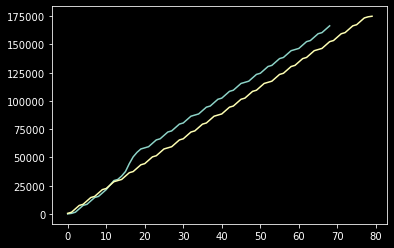

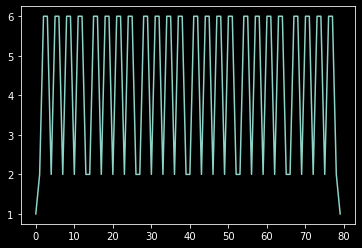

In [15]:
plt.plot(ev.timestamp - ev.timestamp[0])
expected_durations = np.array([1] + [2,6,6,2,6,6,2,6,6,2,6,6,2]*6 + [1])
expected_markers = np.array([5] + [3,2,2,3,2,2,3,2,2,3,2,2,3]*6 + [5])
plt.plot(np.cumsum(expected_durations*500))
plt.figure()
plt.plot(expected_durations)

## Test not the EEG but the experimental output
first the refresh of the background images

(-0.01, 0.08)

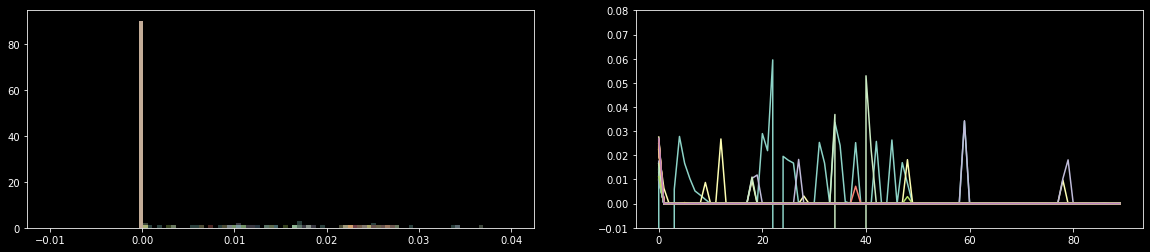

In [ ]:
# seq_T3 = pd.read_hdf('/Users/knapen/Desktop/pRF/sub-1_run-02_task-pRF_apertures/sub-1_run-02_task-pRF_seq_timing.h5', key='trial_003/bg_imgs', mode='r')
# plt.plot(seq_T3.expected_time, seq_T3.empirical_time, 'wo')
# plt.gca().set_aspect(1)
all_diffs = []
f, axs = plt.subplots(1,2,figsize=(20,4))
for i in range(3,80):
    try:
        seq = pd.read_hdf('/Users/knapen/Downloads/data/sub-1_run-03_task-pRF_seq_timing.h5', key=f'trial_{str(i).zfill(3)}/bg_imgs', mode='r')
        axs[0].hist(-seq.expected_time + seq.empirical_time, bins=np.linspace(-0.01,0.04,100), alpha=.3)
        axs[1].plot((-seq.expected_time + seq.empirical_time)[:-2])
        all_diffs.append(np.array((-seq.expected_time + seq.empirical_time)))
    except:
        pass
axs[1].set_ylim(-0.01,0.08)

Then the mask images that define the bars

all_13_diffs, all_90_diffs = [], []
f, axs = plt.subplots(1,1,figsize=(20,4))
for i in range(3,80):
    try:
        seq = pd.read_hdf('/Users/knapen/projects/prf-seeg/experiment/logs/sub-1_run-13_task-pRF_seq_timing.h5', key=f'trial_{str(i).zfill(3)}/bg_imgs', mode='r')
        # axs[0].hist(-seq.expected_time + seq.empirical_time, bins=np.linspace(-0.01,0.04,100), alpha=.3)
        valid_times = seq.empirical_time != 0
        plt.plot(seq.empirical_time[valid_times], (-seq.expected_time[valid_times] + seq.empirical_time[valid_times]))
        if seq.shape[0] == 13:
            all_13_diffs.append(np.array((-seq.expected_time + seq.empirical_time)))
        elif seq.shape[0] == 92:
            all_90_diffs.append(np.array((-seq.expected_time + seq.empirical_time)))
        else:
            print(f'not captured: {seq.shape}')
        # print(i)
    except:
        pass
# axs.set_ylim(-0.01,0.08)
plt.axhline(0.066667, c='w')
all_90_diffs, all_13_diffs = np.array(all_90_diffs), np.array(all_13_diffs)
print(all_90_diffs.shape, all_13_diffs.shape)

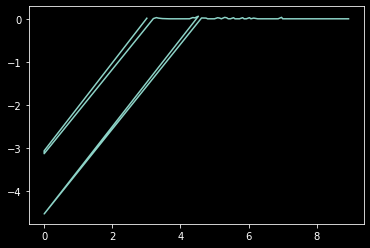

In [ ]:
i = 3
seq = pd.read_hdf('/Users/knapen/Downloads/data/sub-1_run-03_task-pRF_seq_timing.h5', key=f'trial_{str(i).zfill(3)}/apertures', mode='r')
plt.plot(seq.empirical_time, (-seq.expected_time + seq.empirical_time))

In [ ]:
plt.imshow(np.array(all_90_diffs).T, clim=[-0.01, 0.08])
plt.colorbar()

NameError: name 'all_90_diffs' is not defined